In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [35]:
df = pd.read_csv("diamonds.csv")

In [36]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [37]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [38]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [39]:
df.drop(columns="Unnamed: 0",inplace = True)

In [47]:
df.duplicated().sum()

np.int64(146)

In [51]:
df.drop_duplicates(inplace = True)

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.select_dtypes([int,float]).columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [54]:
# Treating Outliers
def IQR(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  IQR = q3-q1
  lower_bound = q1 - 1.5*IQR
  upper_bound = q3 + 1.5*IQR
  print("lower_bound",lower_bound)
  print("upper_bound",upper_bound)

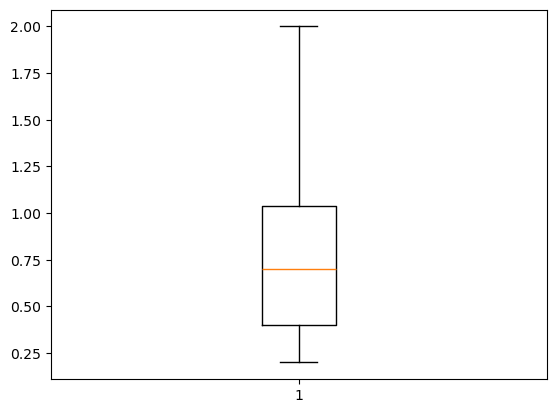

In [93]:
plt.boxplot(df["carat"])
plt.show()

In [86]:
IQR(df["x"])

lower_bound 1.9649999999999999
upper_bound 9.285


In [21]:
IQR(df["carat"])

lower_bound -0.5599999999999999
upper_bound 2.0


In [88]:
df["carat"] = np.where(df["carat"]>2.0,2.0,df["carat"])
df["depth"] = np.where(df["depth"]>64.75,64.75,df["depth"])
df["depth"] = np.where(df["depth"]<58.75,58.75,df["depth"])
df["table"] = np.where(df["table"]>63.5,63.5,df["table"])
df["table"] = np.where(df["table"]<51.5,51.5,df["table"])
df["price"] = np.where(df["price"]>11890.375,11890.375,df["price"])
df["x"] = np.where(df["x"]>9.285,9.285,df["x"])
df["x"] = np.where(df["x"]<1.9649999999999999,1.9649999999999999,df["x"])
df["y"] = np.where(df["y"]>9.27,9.27,df["y"])
df["y"] = np.where(df["y"]<1.9899999999999993,1.9899999999999993,df["y"])
df["z"] = np.where(df["z"]<1.23,1.23,df["z"])
df["z"] = np.where(df["z"]>5.71,5.71,df["z"])

In [94]:
df.select_dtypes(object).columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [96]:
diam = pd.get_dummies(df,columns = ['cut', 'color', 'clarity'],  drop_first=True)

In [99]:
X = diam.drop(columns = ["price"])
y = diam["price"]

In [100]:
X

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.50,55.0,3.95,3.98,2.43,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.80,61.0,3.89,3.84,2.31,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,58.75,63.5,4.05,4.07,2.31,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.40,58.0,4.20,4.23,2.63,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.30,58.0,4.34,4.35,2.75,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.80,57.0,5.75,5.76,3.50,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.10,55.0,5.69,5.75,3.61,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.80,60.0,5.66,5.68,3.56,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.00,58.0,6.15,6.12,3.74,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False


In [101]:
y

0         326.0
1         326.0
2         327.0
3         334.0
4         335.0
          ...  
53935    2757.0
53936    2757.0
53937    2757.0
53938    2757.0
53939    2757.0
Name: price, Length: 53794, dtype: float64

In [107]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.2, random_state = 44)

In [109]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)
lin.score(X_train,y_train)

0.9402396920573215